# Imbalanced Learning
- Define one simple unbalanced classification tasks and solve it with Decision Tree or KNN.
- If the dataset is already unbalanced leave it as it is, otherwise turns the dataset into an imbalanced version (e.g., 96% - 4%, for binary classification).
- Then solve the classification task using the Decision Tree or KNN by adopting at least 2 techniques of imbalanced learning (Undersampling, Oversampling).

STEPS: 
- quindi sbilancio + classifico con dt e knn
- applico under e over + class
- e poi in caso applico dim red + under e over + class (tra quelle viste in cap prima)


TIPI DI BILANCIAMENTO:
- undersampling: Cluster Centroids - Edited Nearest Neighbors - Tomek Links - CondensedNearestNeighbour - RandomUnderSampler
- oversampling: RandomOverSampler - ADASYN - SMOTE
- balancing at the algo level: adjust the class weight- e meta cost sensitive classifier (NO)



In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from collections import defaultdict
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from collections import Counter


from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
%matplotlib inline
import datetime

from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn.utils.fixes import loguniform
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

import joblib
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import label_binarize

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Optional: KNN
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv(r'C:\Users\HUAWEI\Desktop\DM2\project NEW\output_data\df_post_encoding.csv') 
df.shape

(87950, 24)

In [3]:
df = df.drop([ 'popularity','valence', 'energy'], axis = 1)  #'valence', 'energy',
df.head()

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,...,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,key,mode,time_signature,genre,emotion
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,...,0.079080,1.152045,0.157456,-0.277164,0,0,1,3,0.007447,nervous
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,...,0.430642,2.193447,-0.067569,-0.275450,0,5,0,4,0.007447,bored
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,...,1.369974,0.435994,-0.236338,-0.292966,0,7,0,3,0.007447,nervous
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,...,-0.041770,1.533392,-0.573877,-0.286607,0,6,0,4,0.007447,nervous
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,...,-0.283469,0.335164,-0.180082,-0.273545,0,11,0,4,0.007447,nervous


In [4]:
# # Applicare il one-hot encoding solo sulla colonna 'emotion'
# df = pd.get_dummies(df, columns=['emotion'], dtype= int)
# df


#drop altre cat

df = df.drop([ 'key','mode', 'time_signature', 'emotion'], axis = 1)  #'valence', 'energy',
df.head()

,duration_ms,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,popularity_artist,followers_artist,explicit,genre
0,0.797420,-0.186041,-0.588997,1.938632,0.659428,1.766613,-0.889812,2.141972,-1.417948,0.787971,0.039578,0.079080,1.152045,0.157456,-0.277164,0,0.007447
1,2.550119,1.063136,-1.142236,-1.067093,-0.469639,1.816690,-0.530867,-0.080843,0.765656,-1.999208,-0.323653,0.430642,2.193447,-0.067569,-0.275450,0,0.007447
2,0.543118,1.355375,-0.764607,1.004903,-0.879669,1.718254,-1.272670,-0.147003,1.326491,-1.946310,1.670084,1.369974,0.435994,-0.236338,-0.292966,0,0.007447
3,1.592682,0.633373,-1.010613,0.366106,-0.822027,1.836646,-0.443037,0.221461,1.442640,-1.916735,0.088009,-0.041770,1.533392,-0.573877,-0.286607,0,0.007447
4,0.385608,1.126168,-1.234849,-0.443351,0.558406,1.867806,-0.401379,-0.081281,1.442640,0.787971,-0.065355,-0.283469,0.335164,-0.180082,-0.273545,0,0.007447


In [5]:
target = 'explicit'

attributes = [col for col in df.columns if col != target]

X = df[attributes].values
y = np.array(df[target])  # oppure y = df['emotion].values

X.shape, y.shape

((87950, 16), (87950,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# Usando l'opzione stratify=y, garantisci che la suddivisione mantenga la stessa proporzione di classi tra set di addestramento e di test, utile quando hai un set di dati sbilanciato

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((61565, 16), (26385, 16), (61565,), (26385,))

In [7]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True) #798 righe tot

((array([0, 1], dtype=int64), array([56224,  5341], dtype=int64)),
 (array([0, 1], dtype=int64), array([24096,  2289], dtype=int64)))

### classification



In [33]:
#PROVO DUMMY E DT
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc

In [35]:
# DT con grid

dtree = DecisionTreeClassifier(random_state=42)

# Definizione dei parametri da ottimizzare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40]
}

# Configurazione della Grid Search
grid_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=10,  cv=5, n_jobs=-1)

# Addestramento del modello
grid_search.fit(X_train, y_train)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {grid_search.best_params_}")

# Predizioni sul set di test
y_pred = grid_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))


Migliori parametri trovati: {'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 10, 'criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     24096
           1       0.60      0.21      0.32      2289

    accuracy                           0.92     26385
   macro avg       0.77      0.60      0.64     26385
weighted avg       0.90      0.92      0.90     26385



In [42]:
dt =grid_search

In [37]:
train_accuracy = accuracy_score(y_train, dt.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.9266791196296598
Accuratezza sul set di test: 0.9194618154254312


In [44]:
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

# Definizione dei parametri da ottimizzare
param_dist = {
    'n_neighbors': sp_randint(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configurazione della Random Search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Addestramento del modello
random_search.fit(X_train, y_train)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {random_search.best_params_}")

# Predizioni sul set di test
y_pred = random_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))


Migliori parametri trovati: {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     24096
           1       0.75      0.22      0.34      2289

    accuracy                           0.93     26385
   macro avg       0.84      0.61      0.65     26385
weighted avg       0.91      0.93      0.91     26385



In [45]:
knn = random_search

In [46]:
train_accuracy = accuracy_score(y_train, knn.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuratezza sul set di addestramento:", train_accuracy)
print("Accuratezza sul set di test:", test_accuracy)

Accuratezza sul set di addestramento: 0.9999675140095834
Accuratezza sul set di test: 0.925715368580633


IMPOSTO PCA E TSNE

In [47]:
from sklearn.decomposition import PCA

# Riduci la dimensionalità utilizzando PCA
pca = PCA(n_components=2)  # Scegli il numero di componenti principali desiderate
X_pca = pca.fit_transform(X_train)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


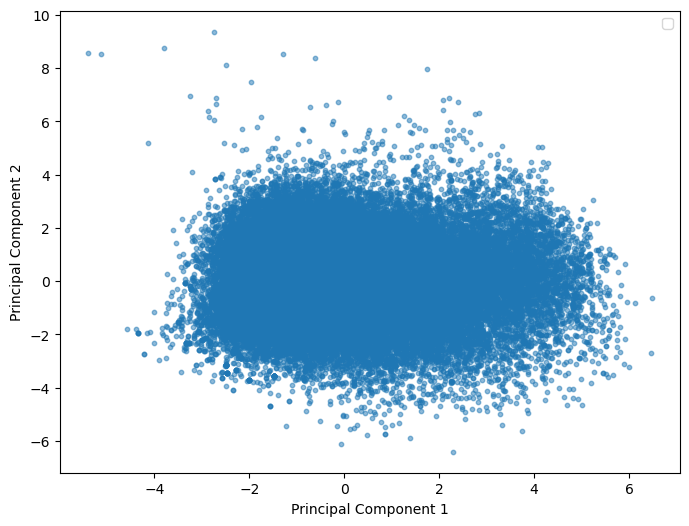

In [48]:
# Plot dei punti ridotti
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='muted', alpha=0.5,  s=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [78]:
X_train.shape, y_train.shape

((61565, 16), (61565,))

In [76]:
#tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_train) 

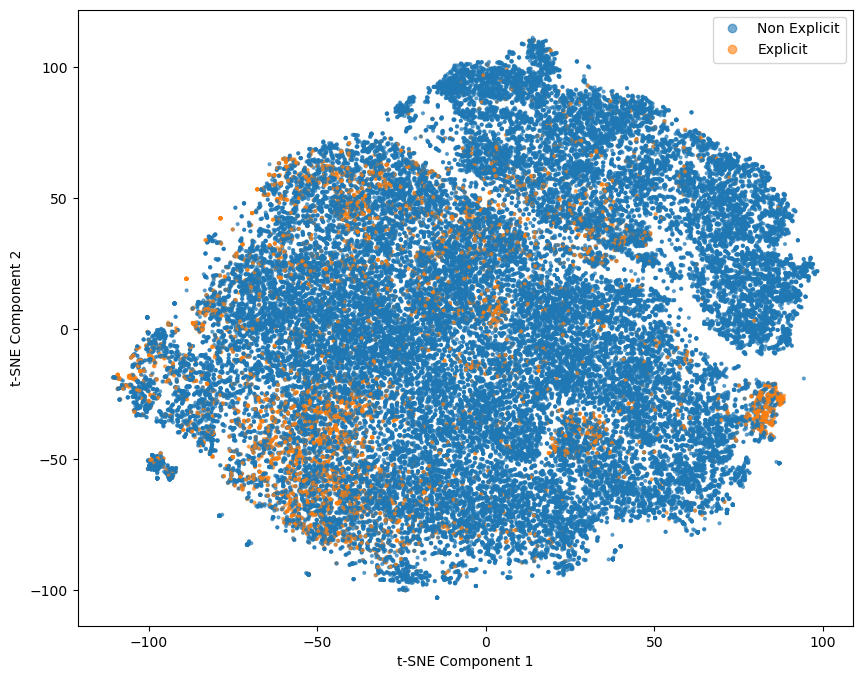

In [77]:
from matplotlib.colors import ListedColormap

# Creazione della mappa dei colori personalizzata
custom_cmap = ListedColormap(['#1f77b4', '#ff7f0e'])  # Ad esempio, blu per 0 e arancione per 1

# Creazione del grafico t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap=custom_cmap, alpha=0.6, s=4)

# Aggiunta della legenda
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['Non Explicit', 'Explicit']
plt.legend(handles, legend_labels)

# Titoli e etichette degli assi
#plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
#imposto colore

palette = 'dark'  # 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'

In [52]:
df['explicit'].value_counts()

explicit
0    80320
1     7630
Name: count, dtype: int64

# Undersampling

diminuisco la classe maggioritaria, cioè la classe 0

In [53]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

### RandomUnderSampler

In [54]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5341, 1: 5341})


In [55]:
# DT con grid

dtree = DecisionTreeClassifier(random_state=42)

# Definizione dei parametri da ottimizzare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40]
}

# Configurazione della Grid Search
grid_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=10,  cv=5, n_jobs=-1)

# Addestramento del modello
grid_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {grid_search.best_params_}")

# Predizioni sul set di test
y_pred = grid_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

dt_randomunder = grid_search

Migliori parametri trovati: {'min_samples_split': 50, 'min_samples_leaf': 30, 'max_depth': 10, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.97      0.75      0.84     24096
           1       0.22      0.74      0.34      2289

    accuracy                           0.75     26385
   macro avg       0.59      0.75      0.59     26385
weighted avg       0.90      0.75      0.80     26385



In [57]:
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

# Definizione dei parametri da ottimizzare
param_dist = {
    'n_neighbors': sp_randint(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configurazione della Random Search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Addestramento del modello
random_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {random_search.best_params_}")

# Predizioni sul set di test
y_pred = random_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

knn_randomunder = random_search

Migliori parametri trovati: {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.98      0.72      0.83     24096
           1       0.22      0.81      0.34      2289

    accuracy                           0.73     26385
   macro avg       0.60      0.76      0.58     26385
weighted avg       0.91      0.73      0.79     26385



### Tomek Links


In [9]:
tl = TomekLinks(sampling_strategy= 'majority')
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 54943, 1: 5341})


In [59]:
# DT con grid

dtree = DecisionTreeClassifier(random_state=42)

# Definizione dei parametri da ottimizzare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40]
}

# Configurazione della Grid Search
grid_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=10,  cv=5, n_jobs=-1)

# Addestramento del modello
grid_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {grid_search.best_params_}")

# Predizioni sul set di test
y_pred = grid_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

dt_tomek = grid_search

Migliori parametri trovati: {'min_samples_split': 30, 'min_samples_leaf': 10, 'max_depth': 10, 'criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     24096
           1       0.54      0.24      0.33      2289

    accuracy                           0.92     26385
   macro avg       0.74      0.61      0.64     26385
weighted avg       0.90      0.92      0.90     26385



In [60]:
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

# Definizione dei parametri da ottimizzare
param_dist = {
    'n_neighbors': sp_randint(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configurazione della Random Search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Addestramento del modello
random_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {random_search.best_params_}")

# Predizioni sul set di test
y_pred = random_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

knn_tomek = random_search

Migliori parametri trovati: {'n_neighbors': 24, 'p': 1, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     24096
           1       0.71      0.24      0.36      2289

    accuracy                           0.93     26385
   macro avg       0.82      0.62      0.66     26385
weighted avg       0.91      0.93      0.91     26385



### Edited Nearest Neighbors


In [61]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 47563, 1: 5341})


In [62]:
# DT con grid

dtree = DecisionTreeClassifier(random_state=42)

# Definizione dei parametri da ottimizzare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40]
}

# Configurazione della Grid Search
grid_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=10,  cv=5, n_jobs=-1)

# Addestramento del modello
grid_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {grid_search.best_params_}")

# Predizioni sul set di test
y_pred = grid_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

dt_enn = grid_search

Migliori parametri trovati: {'min_samples_split': 10, 'min_samples_leaf': 40, 'max_depth': None, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     24096
           1       0.47      0.39      0.42      2289

    accuracy                           0.91     26385
   macro avg       0.71      0.67      0.69     26385
weighted avg       0.90      0.91      0.90     26385



In [63]:
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

# Definizione dei parametri da ottimizzare
param_dist = {
    'n_neighbors': sp_randint(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configurazione della Random Search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Addestramento del modello
random_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {random_search.best_params_}")

# Predizioni sul set di test
y_pred = random_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

knn_enn = random_search

Migliori parametri trovati: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.95      0.90      0.92     24096
           1       0.32      0.48      0.38      2289

    accuracy                           0.86     26385
   macro avg       0.63      0.69      0.65     26385
weighted avg       0.89      0.86      0.88     26385



In [64]:
#tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_res) 

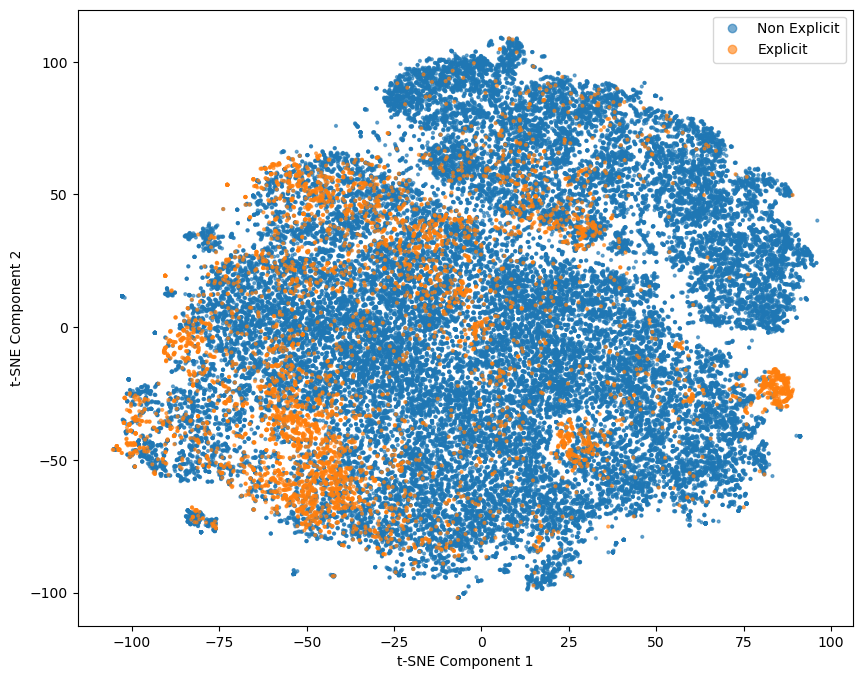

In [75]:
from matplotlib.colors import ListedColormap

# Creazione della mappa dei colori personalizzata
custom_cmap = ListedColormap(['#1f77b4', '#ff7f0e'])  # Ad esempio, blu per 0 e arancione per 1

# Creazione del grafico t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_res, cmap=custom_cmap, alpha=0.6, s=4)

# Aggiunta della legenda
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['Non Explicit', 'Explicit']
plt.legend(handles, legend_labels)

# Titoli e etichette degli assi
#plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# Oversampling

aumento classe 1

In [79]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### RandomOverSampler


In [80]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 56224, 1: 56224})


In [81]:
# DT con grid

dtree = DecisionTreeClassifier(random_state=42)

# Definizione dei parametri da ottimizzare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40]
}

# Configurazione della Grid Search
grid_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=10,  cv=5, n_jobs=-1)

# Addestramento del modello
grid_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {grid_search.best_params_}")

# Predizioni sul set di test
y_pred = grid_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

dt_over = grid_search

Migliori parametri trovati: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     24096
           1       0.30      0.48      0.37      2289

    accuracy                           0.86     26385
   macro avg       0.63      0.69      0.65     26385
weighted avg       0.89      0.86      0.87     26385



In [82]:
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

# Definizione dei parametri da ottimizzare
param_dist = {
    'n_neighbors': sp_randint(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configurazione della Random Search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Addestramento del modello
random_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {random_search.best_params_}")

# Predizioni sul set di test
y_pred = random_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

knn_over = random_search

Migliori parametri trovati: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     24096
           1       0.37      0.36      0.36      2289

    accuracy                           0.89     26385
   macro avg       0.66      0.65      0.65     26385
weighted avg       0.89      0.89      0.89     26385



### SMOTE

In [83]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 56224, 1: 56224})


In [84]:
# DT con grid

dtree = DecisionTreeClassifier(random_state=42)

# Definizione dei parametri da ottimizzare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40]
}

# Configurazione della Grid Search
grid_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=10,  cv=5, n_jobs=-1)

# Addestramento del modello
grid_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {grid_search.best_params_}")

# Predizioni sul set di test
y_pred = grid_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

dt_smote = grid_search

Migliori parametri trovati: {'min_samples_split': 50, 'min_samples_leaf': 1, 'max_depth': 30, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.95      0.86      0.91     24096
           1       0.28      0.56      0.37      2289

    accuracy                           0.84     26385
   macro avg       0.62      0.71      0.64     26385
weighted avg       0.90      0.84      0.86     26385



In [85]:
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

# Definizione dei parametri da ottimizzare
param_dist = {
    'n_neighbors': sp_randint(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configurazione della Random Search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Addestramento del modello
random_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {random_search.best_params_}")

# Predizioni sul set di test
y_pred = random_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

knn_smote = random_search

Migliori parametri trovati: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     24096
           1       0.27      0.48      0.35      2289

    accuracy                           0.84     26385
   macro avg       0.61      0.68      0.63     26385
weighted avg       0.89      0.84      0.86     26385



In [86]:
#tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_res) 

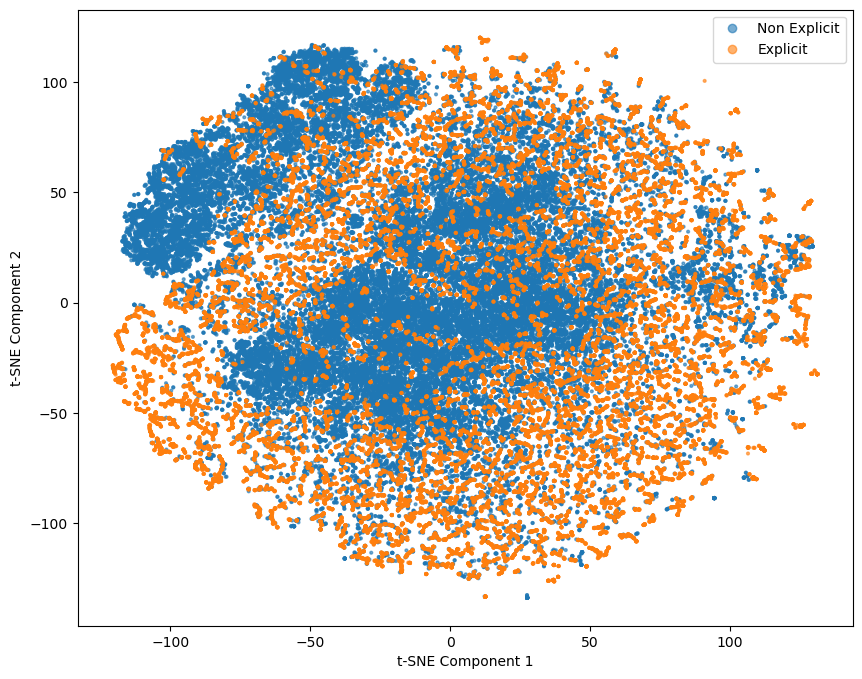

In [87]:
from matplotlib.colors import ListedColormap

# Creazione della mappa dei colori personalizzata
custom_cmap = ListedColormap(['#1f77b4', '#ff7f0e'])  # Ad esempio, blu per 0 e arancione per 1

# Creazione del grafico t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_res, cmap=custom_cmap, alpha=0.6, s=4)

# Aggiunta della legenda
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['Non Explicit', 'Explicit']
plt.legend(handles, legend_labels)

# Titoli e etichette degli assi
#plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### ADASYN

In [88]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 56224, 1: 55696})


In [89]:
# DT con grid

dtree = DecisionTreeClassifier(random_state=42)

# Definizione dei parametri da ottimizzare
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 30, 40, 50],
    'min_samples_leaf': [1, 5, 10, 20, 30, 40]
}

# Configurazione della Grid Search
grid_search = RandomizedSearchCV(estimator=dtree, param_distributions=param_grid, n_iter=10,  cv=5, n_jobs=-1)

# Addestramento del modello
grid_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {grid_search.best_params_}")

# Predizioni sul set di test
y_pred = grid_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

dt_ada = grid_search

Migliori parametri trovati: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     24096
           1       0.28      0.52      0.37      2289

    accuracy                           0.84     26385
   macro avg       0.62      0.70      0.64     26385
weighted avg       0.89      0.84      0.86     26385



In [90]:
from scipy.stats import randint as sp_randint

knn = KNeighborsClassifier()

# Definizione dei parametri da ottimizzare
param_dist = {
    'n_neighbors': sp_randint(1, 31),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Configurazione della Random Search
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Addestramento del modello
random_search.fit(X_res, y_res)

# Migliori parametri trovati
print(f"Migliori parametri trovati: {random_search.best_params_}")

# Predizioni sul set di test
y_pred = random_search.predict(X_test)

# Report di classificazione
print(classification_report(y_test, y_pred))

knn_ada = random_search

Migliori parametri trovati: {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     24096
           1       0.27      0.49      0.34      2289

    accuracy                           0.84     26385
   macro avg       0.61      0.68      0.63     26385
weighted avg       0.89      0.84      0.86     26385



In [91]:
#tsne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_res) 

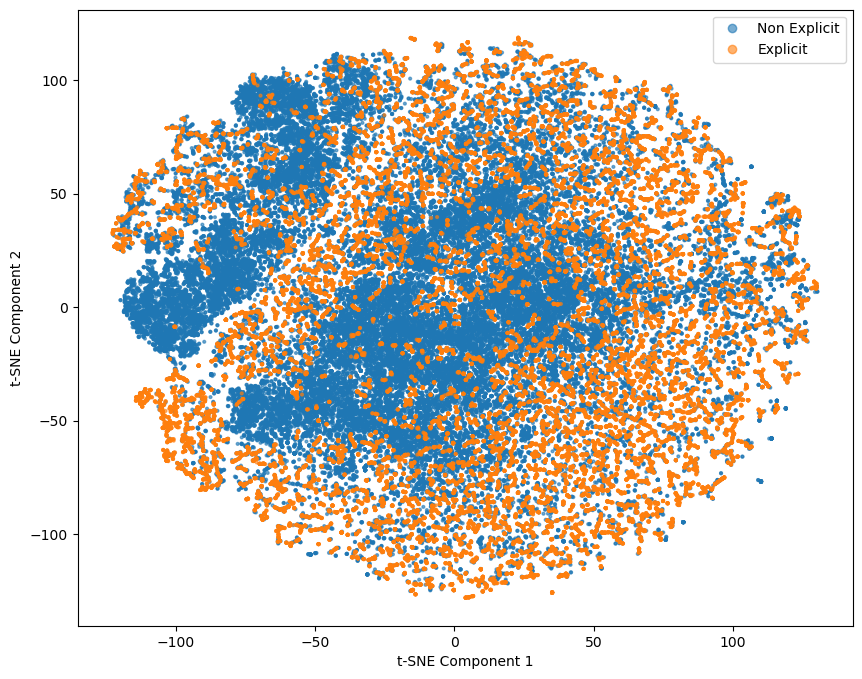

In [92]:
from matplotlib.colors import ListedColormap

# Creazione della mappa dei colori personalizzata
custom_cmap = ListedColormap(['#1f77b4', '#ff7f0e'])  # Ad esempio, blu per 0 e arancione per 1

# Creazione del grafico t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_res, cmap=custom_cmap, alpha=0.6, s=4)

# Aggiunta della legenda
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['Non Explicit', 'Explicit']
plt.legend(handles, legend_labels)

# Titoli e etichette degli assi
#plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [97]:
X_res.shape, y_res.shape

((111920, 16), (111920,))

In [95]:
from sklearn.decomposition import PCA

# Riduci la dimensionalità utilizzando PCA
pca = PCA(n_components=2)  # Scegli il numero di componenti principali desiderate
X_pca = pca.fit_transform(X_res)


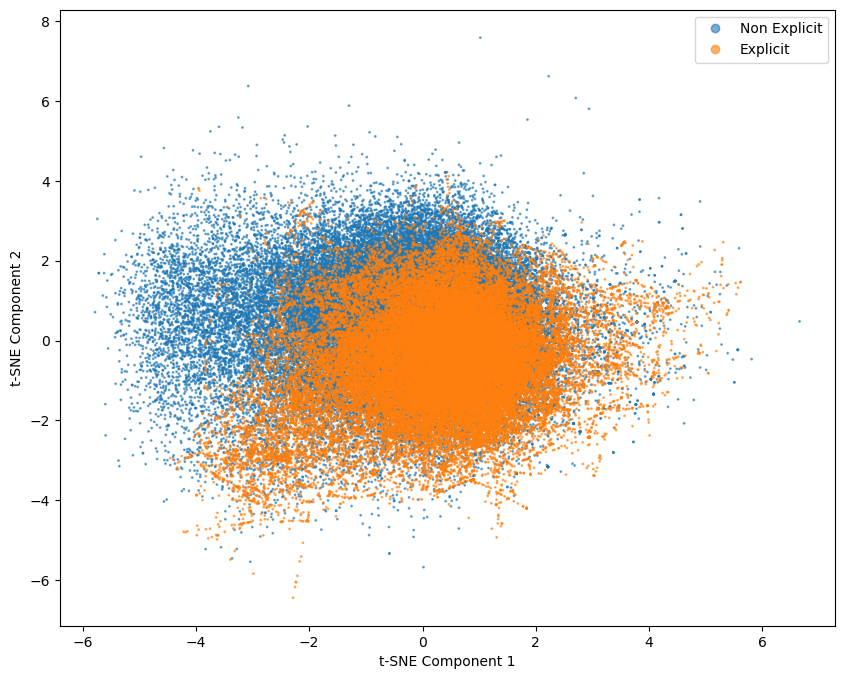

In [98]:
from matplotlib.colors import ListedColormap

# Creazione della mappa dei colori personalizzata
custom_cmap = ListedColormap(['#1f77b4', '#ff7f0e'])  # Ad esempio, blu per 0 e arancione per 1

# Creazione del grafico t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=custom_cmap, alpha=0.6, s=1)

# Aggiunta della legenda
handles, labels = scatter.legend_elements(prop="colors")
legend_labels = ['Non Explicit', 'Explicit']
plt.legend(handles, legend_labels)

# Titoli e etichette degli assi
#plt.title('t-SNE Visualization of Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()